In [1]:

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit
from sklearn import   linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
train_directory = "train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [3]:
X = train[['age' , 'previous']][:]
y = train['y'][:]

In [4]:
classifier = RandomForestClassifier()

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)

In [6]:
classifier.fit(train_data , train_labels)

C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
pred_labels = classifier.predict(test_data)

In [8]:
metrics.roc_auc_score(test_labels, pred_labels)

0.5884547551214218

# Обзор и подготовка данных


In [9]:
data = pd.read_csv(train_directory, header=0 )
data.loc[:10,:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [10]:
data.shape

(3222, 21)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
age               3222 non-null int64
job               3222 non-null object
marital           3222 non-null object
education         3222 non-null object
default           3222 non-null object
housing           3222 non-null object
loan              3222 non-null object
contact           3222 non-null object
month             3222 non-null object
day_of_week       3222 non-null object
duration          3222 non-null int64
campaign          3222 non-null int64
pdays             3222 non-null int64
previous          3222 non-null int64
poutcome          3222 non-null object
emp.var.rate      3222 non-null float64
cons.price.idx    3222 non-null float64
cons.conf.idx     3222 non-null float64
euribor3m         3222 non-null float64
nr.employed       3222 non-null float64
y                 3222 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 528.7+ KB


Итого имеем 21 признак, 1 из которых целевой (y). Пропусков значений нет. 11 признаков имеют числовой тип, 10 - не числовой. Соответственно необходимо промаркировать все имеющиеся значения нечисловых признаков, чтобы можно было использовать их в модели.

Полагаю, что для модели неважно, будет ли например сохранен порядок дней и месяцев при маркировке, поэтому просто промаркируем значения всех нечисловых признаков в цикле.

In [12]:

for feature in list(train):
    if str(train[feature].dtype) not in ('float64','int64'):
        values = train[feature].unique()
        v_num = list(range(len(values)))
        train[feature] = train[feature].replace(values, v_num)

train.loc[:10,:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,0,0,...,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,1,1,0,1,0,1,0,0,...,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,1,0,0,0,1,1,1,...,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1,0,0,0,2,1,1,1,0,...,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,2,0,0,0,0,2,2,...,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,1,1,2,0,1,0,0,3,3,...,3,999,2,1,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,2,1,2,0,0,0,0,3,2,...,4,999,0,0,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,3,0,2,1,0,0,0,2,2,...,2,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,1,2,3,0,1,0,0,2,4,...,1,999,1,1,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,0,0,0,1,1,0,1,0,3,...,1,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0


# Улучшение модели
В исходной модели использовались только 2 признака (age, previous) из 20 имеющихся, поэтому была получена низнакая точность.

Попробуем отобрать наиболее значимые признаки.

1. Метод RFE

Воспользуемся методом рекурсивного исключения признаков (RFE). В результате отобранные признаки будут помечены значением true в массиве support_ и значением 1 в массиве ranking_.

In [13]:
array = train.values

X = array[:,0:20].astype('float')

Y = array[:,20].astype('int64')

model = LogisticRegression()

rfe = RFE(model, 5)

fit = rfe.fit(X, Y)

print( fit.n_features_)

print( fit.support_)

print( fit.ranking_)

5
[False False False False  True False False False False False False  True
 False False  True  True False False  True False]
[16 12  4  8  1  2  6  7  3 13 14  1 15  5  1  1 10  9  1 11]


C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HomePC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [14]:
X = train[['default', 'contact','campaign','previous','euribor3m']]
y = train['y']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scores_rf = cross_validate(classifier, X, y, scoring='roc_auc', cv=sss)

scores_rf['test_score'].mean()

0.6799704882273689

In [15]:
sgd = SGD(max_iter=1000, tol=1e-3)

scores_sgd = cross_validate(sgd, X, y, scoring='roc_auc', cv=sss)
scores_sgd['test_score'].mean()

0.7484741558136052

Были отобраны 6 признаков. Точность модели возрасла, но все же осталась недостаточно высокой. Также возникает вопрос в отношении логики выбора признаков таким способом (почему например в набор попал признак contact, который явно не должен характеризовать платежеспособность клиента).

2. Связь между признаками

Попробуем определить, какие из признаков наиболее сильно связаны (коррелируют) с таргетом. Для этого, соответственно, построим матрицу корреляций и найдем максимальные по модулю значения для таргета.

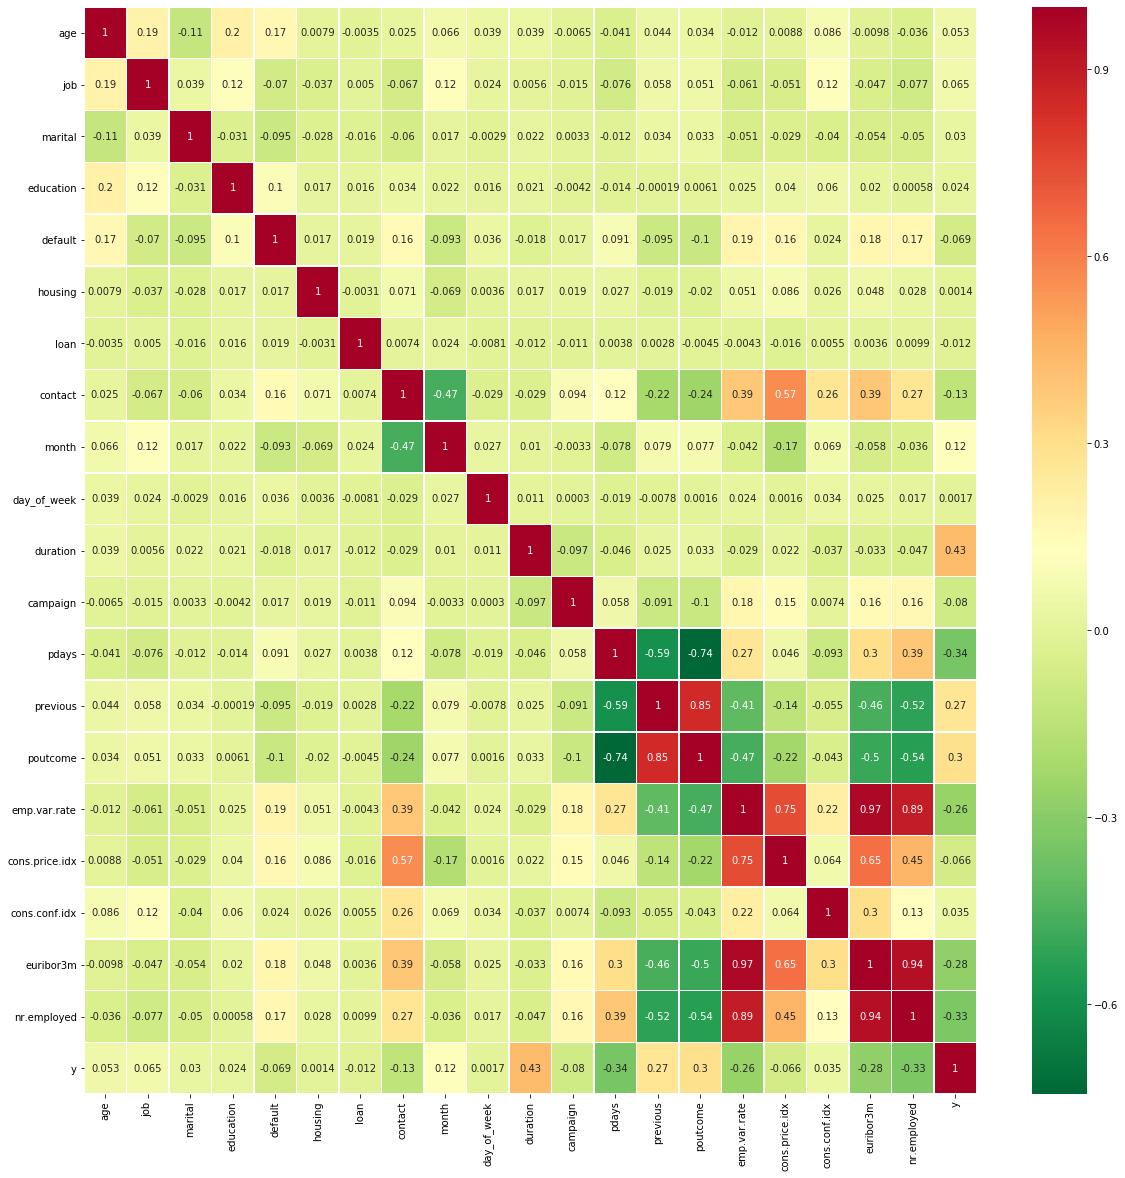

In [16]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(train.corr(),cmap='RdYlGn_r', annot=True, linewidths=.5, ax=ax)

In [17]:
train.corr()['y'].sort_values()

pdays            -0.344608
nr.employed      -0.332281
euribor3m        -0.278375
emp.var.rate     -0.259834
contact          -0.132529
campaign         -0.079928
default          -0.068977
cons.price.idx   -0.065774
loan             -0.011874
housing           0.001405
day_of_week       0.001701
education         0.024080
marital           0.029866
cons.conf.idx     0.034768
age               0.053425
job               0.065297
month             0.115395
previous          0.268134
poutcome          0.295806
duration          0.433596
y                 1.000000
Name: y, dtype: float64

Возьмем 3 максимальных и 4 минимальных значения. Им соответствуют признакам previous, poutcome, duration, pdays, nr.employed, euribor3m, emp.var.rate.

Чтобы проверить, не избыточен ли набор признаков, посмотрим как они коррелируют между собой.

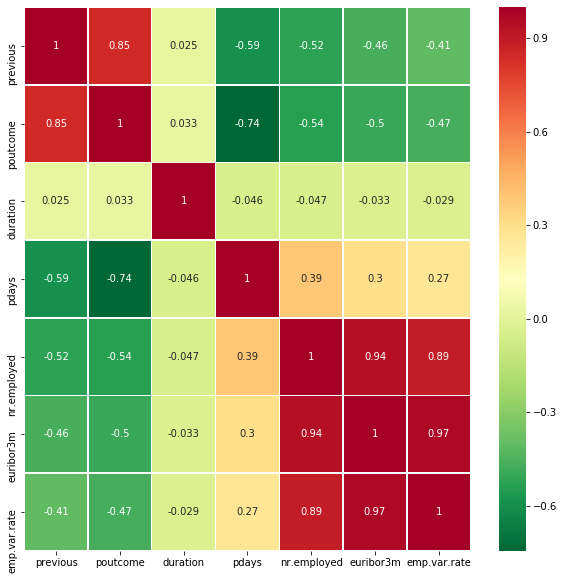

In [18]:
feat_corr = train[['previous', 'poutcome', 'duration', 'pdays', 'nr.employed', 'euribor3m', 'emp.var.rate']].corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(feat_corr,cmap='RdYlGn_r', annot=True, linewidths=.5, ax=ax)

На тепловой карте видим высокии значения корреляции для пар признаков:

previous - poutcome

nr.employed - euribor3m

nr.employed - emp.var.rate

euribor3m - emp.var.rate

Из них оставим: poutcome, nr.employed, emp.var.rate

Итого имеем следующие признаки: duration, pdays, poutcome, nr.employed, emp.var.rate

In [19]:
X = train[['poutcome', 'duration', 'pdays', 'nr.employed', 'emp.var.rate']]
y = train['y']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scores_rf = cross_validate(classifier, X, y, scoring='roc_auc', cv=sss)

scores_rf['test_score'].mean()

0.8227775282821156

In [20]:
sgd = SGD(max_iter=1000, tol=1e-3)

scores_sgd = cross_validate(sgd, X, y, scoring='roc_auc', cv=sss)
scores_sgd['test_score'].mean()

0.8802463591454416

# Результат
Максимальное полученное значение показателя roc-auc - 0.88.

Для улучшения результата можно поработать над следующими моментами:

- Использовать другие методы автоматического подбора признаков (была попытка использовать RFE)
- Найти другой способ поиска взаимосвязи между признаками, т.к. в случае нелинейной зависимости матрица корреляций не даст нужного результата
- Поработать непосредственно с параметрами используемых алгоритмов RandomForest и SGD
- Попробовать подобрать признаки исходя из их сути. Например предположить, что работа (job) клиента сильнее влияет на то, уйдет ли платеж в просрок или нет, чем наличие собственного жилья или семьи.